In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.concat([pd.read_csv("/content/drive/MyDrive/DAT565/Data/life-expectancy-at-birth-oecd.csv")])
years_to_filter = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_2018 = df[df['Year'].isin(years_to_filter)]
df_2018.count()
print(df_2018)

FileNotFoundError: ignored

In [ ]:
# Task 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import random

years_to_filter = [2019] #Visable year in graph

df = pd.concat([pd.read_csv("life-expectancy-at-birth-oecd.csv")])
df_year = df[df['Year'].isin(years_to_filter)] #Life expectancy for chosen year

df2 = pd.concat([pd.read_csv("national-gdp-penn-world-table.csv")])
df2_year = df2[df2['Year'].isin(years_to_filter)] #GDP for chosen year


olC = set(df_year['Entity']) & set(df2_year['Entity']) #Finding which countries has both data types
dfc = df_year[df_year['Entity'].isin(olC)]  #Life expectancy list for joint countries
df2c = df2_year[df2_year['Entity'].isin(olC)] #GDP list for joint countries

print(dfc.describe()) #TShows mean life expectancy
print(df2c.describe()) #Shows mean GDP

xValues = df2c['GDP (output, multiple price benchmarks)']
yValues = dfc['Period life expectancy at birth - Sex: all']


ax = plt.axes()
ax.set_facecolor('#DCDCDC') #color of graph
plt.grid(True)              #grid on

#scatterplot with joint variable countries combining life expectancy to gdp from the two data sets
for i, entity in enumerate(olC):
    x = df2c[df2c['Entity'] == entity]['GDP (output, multiple price benchmarks)']
    y = dfc[dfc['Entity'] == entity]['Period life expectancy at birth - Sex: all']
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))   #Random color choice from the CSS4 hex-list

    plt.scatter(x, y, color=color, label=entity)

plt.title('Life expectancy vs GDP')
plt.xlabel('GDP [$]')
plt.ylabel('Life expectancy [Years of age]')
plt.xscale('log')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol = 3)
legend.get_frame().set_facecolor('#DCDCDC')
plt.show()

# Comptute the Pearson correlation coefficient for Question 3
PCC = np . corrcoef ( xValues , yValues ) [0 , 1]
print ( " Pearson correlation coefficient : " , PCC)

FileNotFoundError: ignored

In [ ]:
#Task 4 graph with colors.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import random

years_to_filter = [2019]

df = pd.concat([pd.read_csv("life-expectancy-at-birth-oecd.csv")])
df_year = df[df['Year'].isin(years_to_filter)]

df2 = pd.concat([pd.read_csv("gdp-per-capita-penn-world-table.csv")])
df2_year = df2[df2['Year'].isin(years_to_filter)]

olC = set(df_year['Entity']) & set(df2_year['Entity'])
dfc = df_year[df_year['Entity'].isin(olC)]
df2c = df2_year[df2_year['Entity'].isin(olC)]


xValues = df2c['GDP per capita (output, multiple price benchmarks)']
yValues = dfc['Period life expectancy at birth - Sex: all']


ax = plt.axes()
ax.set_facecolor('#DCDCDC')
plt.grid(True)

# Scatterplot
for i, entity in enumerate(olC):
    x = df2c[df2c['Entity'] == entity]['GDP per capita (output, multiple price benchmarks)']
    y = dfc[dfc['Entity'] == entity]['Period life expectancy at birth - Sex: all']
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))

    plt.scatter(x, y, color=color, label=entity)

plt.title('Life expectancy vs GDP per capita')
plt.xlabel('GDP per capita [$]')
plt.ylabel('Life expectancy [Years of Age]')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol = 3)
legend.get_frame().set_facecolor('#DCDCDC')
plt.show()



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DAT565/Data/life-expectancy-at-birth-oecd.csv")
Life_Expectancy = (50,60.70)
Life_Expectancy = df[df['Period life expectancy at birth - Sex: all'].isin(Life_Expectancy)]
Life_Expectancy.count()
print (Life_Expectancy)


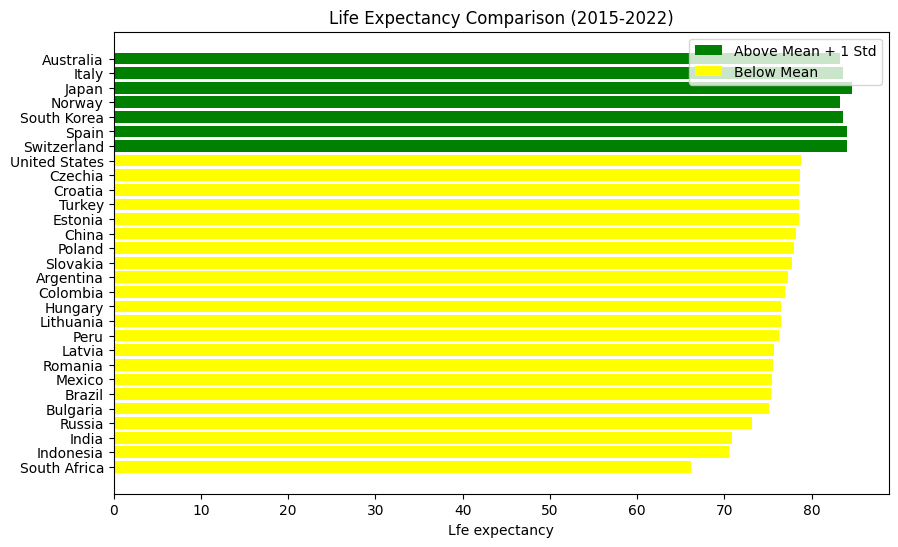

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("life-expectancy-at-birth-oecd.csv")

df= df.dropna(subset =['Life expectancy'])

# Filter the data for the years 2015-2022
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2022)]

# Calculate the mean and standard deviation of 'Life expectancy' for the selected years
LE_mean = filtered_df['Life expectancy'].mean()
LE_std = filtered_df['Life expectancy'].std()

# Filter the data based on the condition (Life expectancy > mean + std)
above_mean_std = filtered_df[filtered_df['Life expectancy'] > (LE_mean + LE_std)]

# Filter the data based on the condition (Life expectancy < mean)
below_mean = filtered_df[filtered_df['Life expectancy'] < LE_mean]

# Order the data by life expectancy
above_one_std = above_mean_std.sort_values(by='Life expectancy', ascending=False)
below_mean = below_mean.sort_values(by='Life expectancy', ascending=False)

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
plt.barh(above_mean_std['Entity'], above_mean_std['Life expectancy'], color='green', label='Above Mean + 1 Std')
plt.barh(below_mean['Entity'], below_mean['Life expectancy'], color='Yellow', label='Below Mean')
plt.xlabel('Lfe expectancy')
plt.title('Life Expectancy Comparison (2015-2022)')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


In [ ]:
# Load the data from the CSV file
df = pd.read_csv("life-expectancy-at-birth-oecd.csv")

# Filter the data for the years 2015-2022
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2022)]

# Calculate the mean and standard deviation of 'Life expectancy' for the selected years
LE_mean = filtered_df['Life expectancy'].mean()
LE_std = filtered_df['Life expectancy'].std()

# Filter the data based on the condition (Life expectancy > mean + std)
Life_Expectancy = filtered_df[filtered_df['Life expectancy'] > (LE_mean + LE_std)]

Life_Expectancy.to_csv('life_expectancy_above_mean.csv', index=False)

# Display the countries with life expectancy higher than one standard deviation above the mean
display(Life_Expectancy)


,Entity,Code,Year,Life expectancy
106,Australia,AUS,2021,83.3
1479,Italy,ITA,2016,83.4
1481,Italy,ITA,2018,83.4
1482,Italy,ITA,2019,83.6
1540,Japan,JPN,2015,83.9
1541,Japan,JPN,2016,84.1
1542,Japan,JPN,2017,84.2
1543,Japan,JPN,2018,84.3
1544,Japan,JPN,2019,84.4
1545,Japan,JPN,2020,84.6


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("life-expectancy-at-birth-oecd.csv")

filtered_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2022)]
LE_mean = filtered_df['Life expectancy'].mean()
LE_std = filtered_df['Life expectancy'].std()
one_std_above_mean = LE_mean + LE_std

display("Mean", LE_mean)
display("Standard deviation", LE_std)
display("one standard deviation above mean", one_std_above_mean)

'Mean'

78.85787965616045

'Standard deviation'

4.344599908482493

'one standard deviation above mean'

83.20247956464294

In [ ]:
import pandas as nd
import numpy as np

df = pd.read_csv("life-expectancy-at-birth-oecd.csv")
LE_std = filtered_df['Life expectancy'].std()

display(LE_std)

4.344599908482493